<a href="https://colab.research.google.com/github/abdulloyev/DataScientis-openSource/blob/main/%234%20Chiziqli_regressiya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ✈ ✈ ✈

---

> **Bu yerga etibor berish shart emas!** 💪

In [ ]:
!jupyter nbconvert --to html /content/_4_Chiziqli_regressiya.ipynb

[NbConvertApp] Converting notebook /content/_4_Chiziqli_regressiya.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 607525 bytes to /content/_4_Chiziqli_regressiya.html


## Kerakli kutubxonalarni chaqirib olamiz

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Ma'lumotlar to'plamini yuklab olamiz

In [ ]:
# Fayilni linki `Uy_bazasi`
file_link = "https://drive.google.com/uc?export=download&id=1LsfH-bL2ArxLRaVj6oXgfC-nsEirqv2Q"

In [ ]:
df = pd.read_csv(file_link, index_col=0)
df.head()

,Hudud,Xona,Maydon,Qavat,Uy_qavati,Narx
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0


## Ma'lumotlar to'plamidan faqat "Chilonzor" tumanidagi uylarni ajratibb olamiz

In [ ]:
Uy = df[df.Hudud=="Чиланзарский"]
Uy.head()

,Hudud,Xona,Maydon,Qavat,Uy_qavati,Narx
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


## Chilonzor tumanidagi uylarning `Maydoni` va `Narx` ustunlarni ajratib olamiz

In [ ]:
# maydon `Seres` tegishli edi
X = Uy['Maydon'].to_numpy() # buni numpyning arr siga aylantiramiz
X

array([42., 65., 70., ..., 32., 70., 30.])

In [ ]:
Y = Uy['Narx'].to_numpy()
Y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])

## Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

 * 1). Rasmning o‘lchamini belgilaydi. Rasmning kengligi 10 dyuym, balandligi 5 dyuym

 * 2). Bu qismda **`seaborn`** kutubxonasi yordamida `Uy` nomli ma'lumotlar to‘plamidan 'Maydon' ustuni **`x`** o‘qi, 'Narx' ustuni esa **`y`** o‘qi sifatida chiziladi. Natijada nuqtali *diagramma (scatter plot)* hosil bo‘ladi.

 * 3). Rasm uchun nom va uni ekranga chiqarish

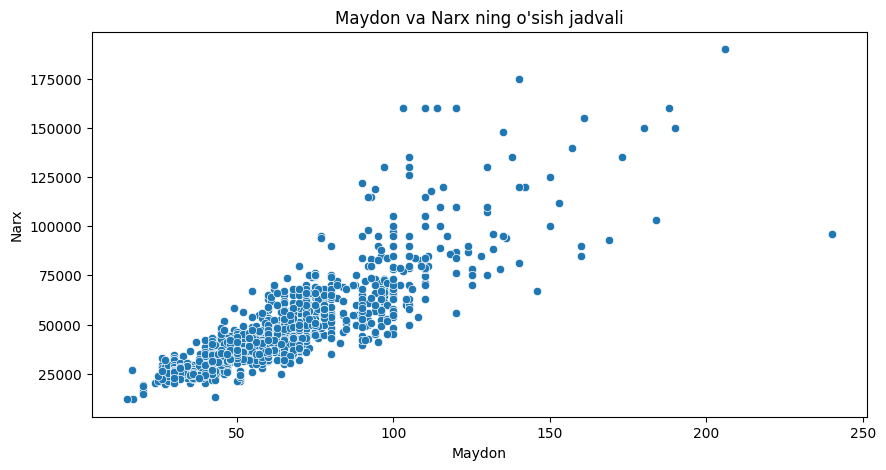

In [ ]:
#1
plt.figure(figsize=(10, 5))

# 2
sns.scatterplot(data=Uy, x='Maydon', y="Narx")

# 3
plt.title("Maydon va Narx ning o'sish jadvali", loc="center")
plt.show() # rasmni ko'rish uchun

## x va y o’zgaruvchilardan quyidagi formuladan foydalangan holda a va b koeffisientlarni hisoblaymiz

Bu yerda 𝑥̃ - x ustun uchun o'rtracha qiymat, 𝑦̃- y ustun uchun o'rtacha qiymat.

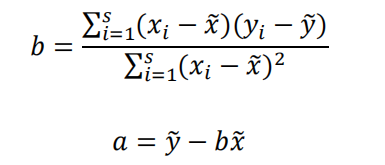

### Dastlab, a va b koeffisientlarni hisoblab olamiz.

> formuladan foydalangan holda `x_ortacha` va `y_ortacha` ni topib oldik

In [ ]:
x_ortacha = np.mean(X)
y_ortacha = np.mean(Y)

> Formulaning `b` koeffisientni topib olamiz

In [ ]:
b = sum((X-x_ortacha)*(Y-y_ortacha))/sum((X-x_ortacha)**2)
print(f"b = {b}")

b = 740.0264822713287


> Formulaning `a` koeffisientni topib olamiz

In [ ]:
a = y_ortacha - b*x_ortacha
print(f"a = {a}")

a = -195.94911352690542


## Ma'lumotlarni ajratib olish
> **`Uy`** dataFrame dan ixtiyoriy 10 ta qiymatni **`Maydon`** va **`Narx`** ustunlaridan ajratib olamiz

> **`random_state=42`** parametri tasodifiylikni boshqarish uchun ishlatiladi, ya'ni har safar bir xil natijani olish uchun.

In [ ]:
maydon_test = Uy.sample(10, random_state=42)['Maydon'].to_numpy()
print(f'maydon_test = {maydon_test}')

maydon_test = [54. 42. 36. 60. 48. 68. 38. 65. 52. 44.]


In [ ]:
narx_test = Uy.sample(10, random_state=42)['Narx'].to_numpy()
print(f'narx_test = {narx_test}')

narx_test = [37500. 26500. 25500. 39000. 32500. 34500. 22700. 47000. 37900. 36000.]


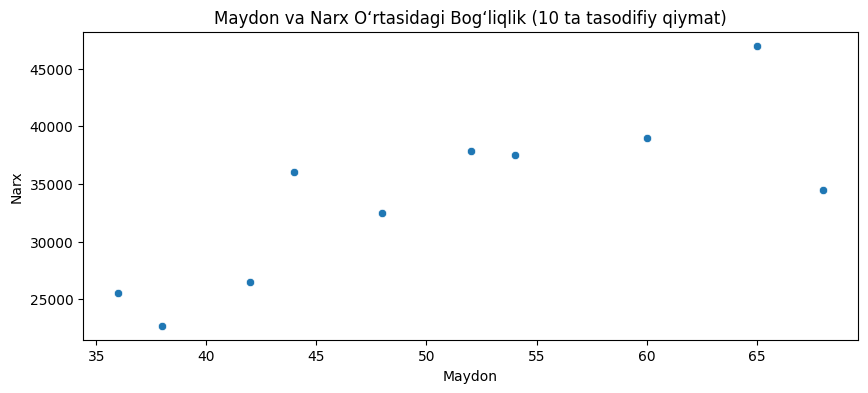

In [ ]:
# Grafik yaratib olamiz
plt.figure(figsize=(10, 4))
sns.scatterplot(x=maydon_test, y=narx_test)

# Jadval haqida ma'lumotlarni yozamiz
plt.title('Maydon va Narx O‘rtasidagi Bog‘liqlik (10 ta tasodifiy qiymat)')
plt.xlabel('Maydon')
plt.ylabel('Narx')
plt.show()

## Regressiya Chizig‘i
> nuqtalar orasidagi trendni ko‘rsatmoqchi bo'lsak, **`sns.regplot`** dan foydalanamiz

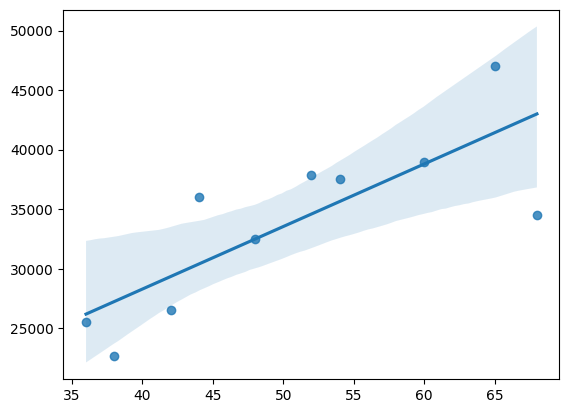

In [ ]:
sns.regplot(x=maydon_test, y=narx_test, scatter=True)
plt.show()

# rasm ko'rnishda saqlashimiz ham mumkin ekan
plt.savefig('maydon_narx.png')

## Ajratilgan 10 ta qiymatga narxlarni **bashorat** qilamiz:
> `a` va `b` koeffisientlari uchun

In [ ]:
y_bashorat = a + b * maydon_test
print(f'y_bashorat = {y_bashorat}')

y_bashorat = [39765.48092912 30885.16314187 26445.00424824 44205.63982275
 35325.3220355  50125.85168092 27925.05721278 47905.77223411
 38285.42796458 32365.21610641]


> Bashorat qilingan qiymatlar (`y_bashorat`) va haqiqiy qiymatlar (`narx_test`) o‘rtasidagi farqni hisoblash orqali modelning xatosini o‘lchashimiz mumkin:

In [ ]:
xatolar = narx_test - y_bashorat
print(f"Xatolar: {xatolar}")

Xatolar: [ -2265.48092912  -4385.16314187   -945.00424824  -5205.63982275
  -2825.3220355  -15625.85168092  -5225.05721278   -905.77223411
   -385.42796458   3634.78389359]


## *`O'rtacha kvadrat`* xatolik va *`o'rtacha absolyut`* xatolikni hisoblaymiz.

> MAE qiymati 4140 bo‘lib, bu bashorat qilingan narxlar va haqiqiy narxlar o‘rtasidagi o‘rtacha farq 4140 so‘m ekanligini ko‘rsatmoqda

> MAE qancha kichik bo‘lsa, model shuncha aniqroq deb hisoblanadi

In [ ]:
# MAE - modelning aniqligini baholash uchun ishlatiladi
MAE = np.sum(np.absolute(y_bashorat - narx_test)) / len(narx_test)
print(f'MAE = {MAE}')

MAE = 4140.35031634715


> RMSE qiymati 5882.05 bo‘lib, bu bashorat qilingan narxlar va haqiqiy narxlar o‘rtasidagi o‘rtacha kvadratik xato 5882.05 ekanligini ko‘rsatadi.

> RMSE qancha kichik bo‘lsa, model shuncha aniqroq deb hisoblanadi

In [ ]:
# RMSE - modelning aniqligini baholash uchun ishlatiladi
RMSE = np.sqrt(np.sum((y_bashorat - narx_test)**2) / len(narx_test))
print(f'RMSE = {RMSE}')

RMSE = 5882.051673173715


**RMSE va MAE Farqi:**

* **RMSE:** Katta xatolarni ko‘proq og‘irlantiradi, chunki farqlar kvadratga olinadi.

* **MAE:** Barcha xatolarni bir xil og‘irlikda hisoblaydi.

## Topilgan `a` va `b` koeffisientlar yordamida **`𝑦 = 𝑎𝑥 + 𝑏`** tenglama uchun regressiya chizig’ini chizamiz.

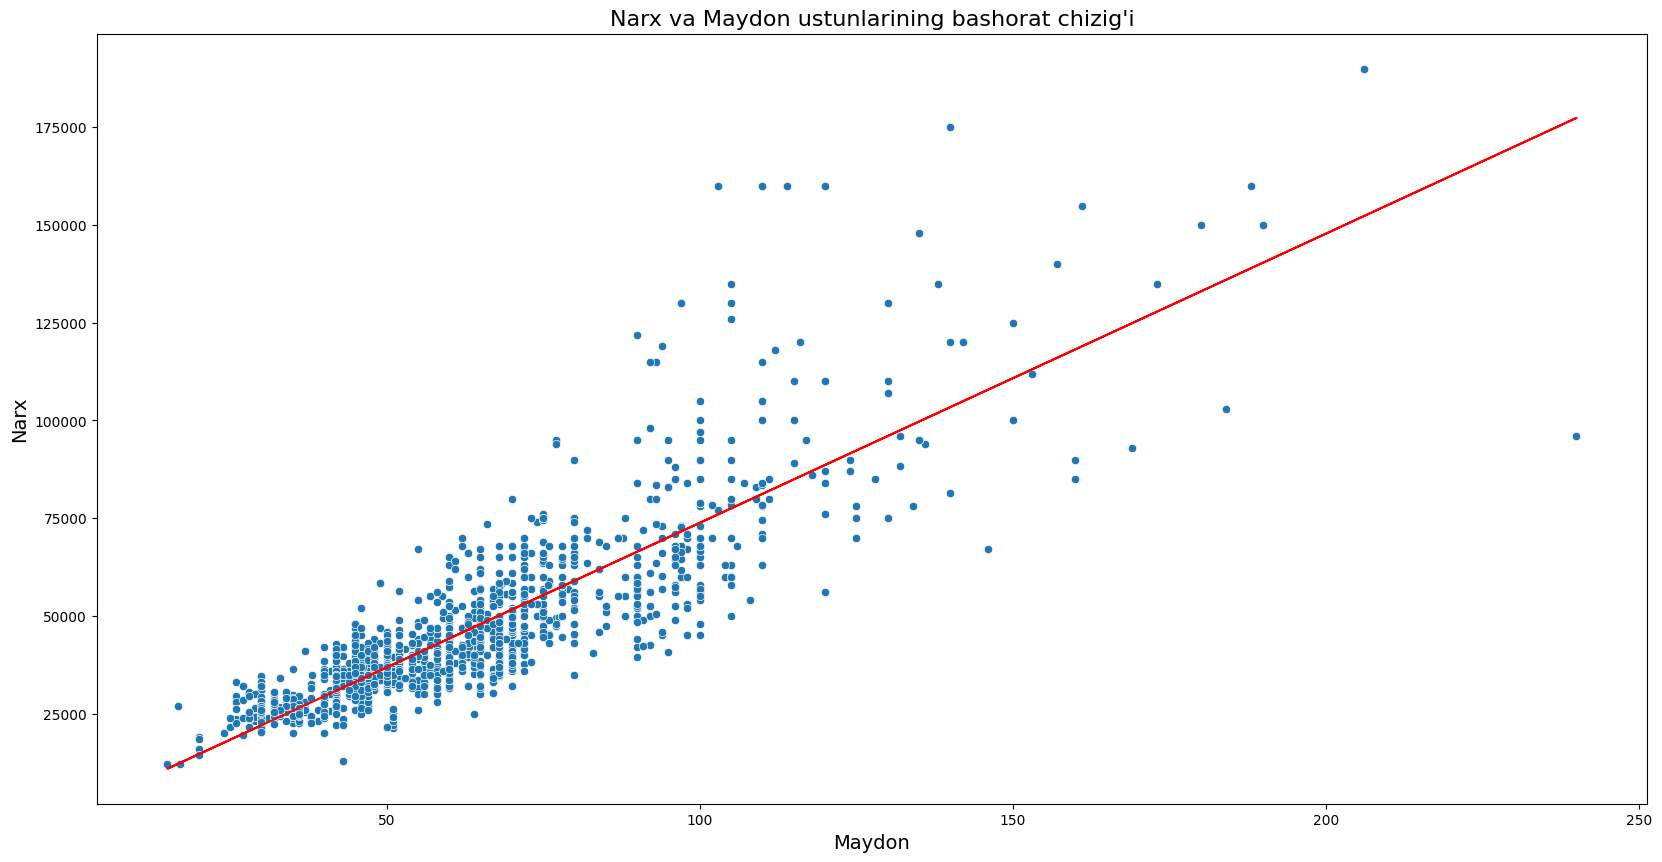

In [ ]:
plt.figure(figsize=(20, 10))

sns.scatterplot(Uy, x="Maydon", y="Narx")
plt.plot(X, b*X + a, '-r')

plt.title("Narx va Maydon ustunlarining bashorat chizig'i", fontdict={'fontsize': 16})
plt.xlabel("Maydon", fontdict={'fontsize': 14})
plt.ylabel("Narx", fontdict={'fontsize': 14})

plt.show()